In [2]:
import math
import warnings

%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

# Loading Data

In [3]:
df = pd.read_excel("/Users/saurabh/Documents/PythonData/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls", encoding = "ISO-8859-1", skiprows=4)

In [4]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 13 columns):
City                                    351 non-null object
Population                              348 non-null float64
Violent
crime                           348 non-null float64
Murder and
nonnegligent
manslaughter    348 non-null float64
Rape
(revised
definition)1              0 non-null float64
Rape
(legacy
definition)2               348 non-null float64
Robbery                                 348 non-null float64
Aggravated
assault                      348 non-null float64
Property
crime                          348 non-null float64
Burglary                                348 non-null float64
Larceny-
theft                          348 non-null float64
Motor
vehicle
theft                     348 non-null float64
Arson3                                  187 non-null float64
dtypes: float64(12), object(1)
memory usage: 35.7+ KB


In [6]:
df.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
count,348.000,348.000,348.000,0.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,187.000
mean,40037.632,201.595,1.566,nan,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.872
std,450037.368,2815.269,18.304,nan,60.425,1031.033,1706.132,7659.725,924.949,6346.054,403.424,10.693
min,526.000,0.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3003.000,2.000,0.000,nan,0.000,0.000,1.000,40.500,6.000,31.000,0.000,0.000
50%,7233.500,6.000,0.000,nan,0.000,1.000,4.000,112.500,17.500,94.000,2.000,0.000
75%,18427.500,22.000,0.000,nan,2.000,5.000,14.000,341.000,51.250,287.250,7.000,1.000
max,8396126.000,52384.000,335.000,nan,1112.000,19170.000,31767.000,141971.000,16606.000,117931.000,7434.000,132.000


In [7]:
df.fillna(df.mean(),inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 13 columns):
City                                    351 non-null object
Population                              351 non-null float64
Violent
crime                           351 non-null float64
Murder and
nonnegligent
manslaughter    351 non-null float64
Rape
(revised
definition)1              0 non-null float64
Rape
(legacy
definition)2               351 non-null float64
Robbery                                 351 non-null float64
Aggravated
assault                      351 non-null float64
Property
crime                          351 non-null float64
Burglary                                351 non-null float64
Larceny-
theft                          351 non-null float64
Motor
vehicle
theft                     351 non-null float64
Arson3                                  351 non-null float64
dtypes: float64(12), object(1)
memory usage: 35.7+ KB


In [9]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,1.872
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,1.872


# Feature Engineering

since we have to build a regression model to predict property crimes, after analysing data we can see population has some effect also lets create new features Burglary, Robbery and Murder which are continuous variables. For this model, we will create categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0.

In [10]:
df['population_square'] = df['Population'] * df['Population']
df['Robbery_new'] = np.where(df['Robbery']>0, 1, 0)
df['Burglary_new'] = np.where(df['Burglary']>0, 1, 0)
df['murder_new'] = np.where(df.iloc[:,3]>0, 1,0)

In [11]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,population_square,Robbery_new,Burglary_new,murder_new
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000,3463321.000,0,1,0
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000,6640929.000,0,1,0
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000,8099716.000,0,1,0
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,1.872,9595377936.000,1,1,1
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,1.872,40806544.000,1,1,0


In [12]:
df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3',
       'population_square', 'Robbery_new', 'Burglary_new', 'murder_new'],
      dtype='object')

In [13]:
df.fillna(df.mean(),inplace=True)

In [14]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['Property\ncrime'].values.reshape(-1, 1)
X = df[['Population','population_square','Robbery_new','Burglary_new','murder_new']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 3.47522452e-02 -2.12202297e-09 -8.68447761e+01 -7.91342914e+01
  -1.06495203e+01]]

Intercept: 
 [-42.07570649]

R-squared:
0.9961080148998049


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


The model where the outcome Property Crime is predicted by the features population, robbery, murder and burglary explains 99.6% of the variance in Property Crime.Looking at the coefficients, Property Crime have the highest per-unit increase when population is more (3.47522452e-02).

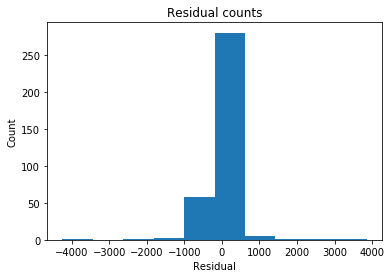

In [15]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df['Property\ncrime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

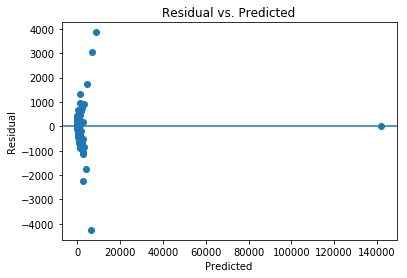

In [16]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [17]:
print(np.argmax(predicted))

216


In [18]:
Y[215:218]

array([[4.71000e+02],
       [1.41971e+05],
       [6.40000e+01]])

In [19]:
df_new = df.drop(df.index[216])

In [20]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df_new['Property\ncrime'].values.reshape(-1, 1)
X = df_new[['Population','population_square','Robbery_new','Burglary_new','murder_new']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[1.28652022e-02 1.15532821e-07 9.32891506e+01 4.53632246e-01
  1.84513443e+02]]

Intercept: 
 [-16.76281136]

R-squared:
0.8444522220391296


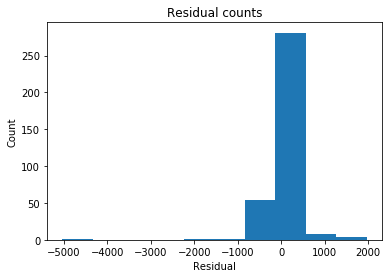

In [21]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df_new['Property\ncrime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

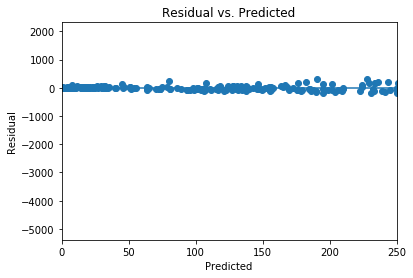

In [22]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.xlim([0, 250])
plt.title('Residual vs. Predicted')
plt.show()

In [23]:
df_new.fillna(df.mean(),inplace=True)

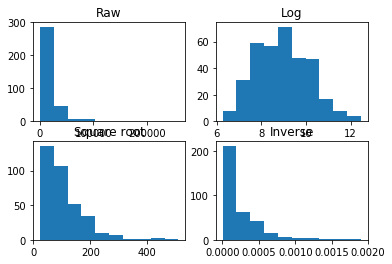

In [24]:
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df_new['Population'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df_new['Population'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df_new['Population'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df_new['Population'].dropna())
plt.title('Inverse')
plt.show()



In [25]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 350
Data columns (total 17 columns):
City                                    350 non-null object
Population                              350 non-null float64
Violent
crime                           350 non-null float64
Murder and
nonnegligent
manslaughter    350 non-null float64
Rape
(revised
definition)1              0 non-null float64
Rape
(legacy
definition)2               350 non-null float64
Robbery                                 350 non-null float64
Aggravated
assault                      350 non-null float64
Property
crime                          350 non-null float64
Burglary                                350 non-null float64
Larceny-
theft                          350 non-null float64
Motor
vehicle
theft                     350 non-null float64
Arson3                                  350 non-null float64
population_square                       350 non-null float64
Robbery_new                             350 

In [26]:
df_new['Burglary']

0       2.000
1       3.000
2       1.000
3     705.000
4      53.000
5      10.000
6       0.000
7     204.000
8      16.000
9      99.000
10      3.000
11      4.000
12      0.000
13      0.000
14    132.000
15      3.000
16     10.000
17     16.000
18    103.000
19     32.000
20     26.000
21     50.000
22    525.000
23      2.000
24     20.000
25      2.000
26      4.000
27      6.000
28      9.000
29      3.000
        ...  
321   449.000
322    39.000
323    13.000
324    91.000
325    18.000
326     5.000
327     5.000
328     6.000
329    23.000
330   169.000
331    58.000
332    10.000
333     9.000
334   101.000
335     5.000
336    32.000
337     4.000
338   166.000
339    12.000
340    77.000
341    14.000
342    13.000
343     9.000
344     8.000
345    13.000
346   470.000
347    45.000
348   119.684
349   119.684
350   119.684
Name: Burglary, Length: 350, dtype: float64

Text(0.5,1,'Raw')

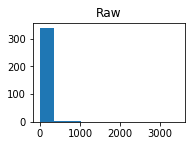

In [33]:
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df_new['Burglary'])
plt.title('Raw')


In [34]:
print(np.argwhere(np.isnan(df_new['Burglary'])))

[]


In [38]:
print(df_new['Burglary'].nonzero()[0])

[  0   1   2   3   4   5   7   8   9  10  11  14  15  16  17  18  19  20
  21  22  23  24  25  26  27  28  29  30  31  32  33  35  36  37  38  39
  40  41  42  43  45  46  47  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  96
  97  98  99 100 101 102 103 104 105 107 108 109 110 111 112 113 114 115
 116 117 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 150 151 152 153
 154 155 156 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 187 188 189 190 191
 192 193 194 195 196 197 198 199 201 202 203 204 205 206 207 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 256 258 259 260 261 262 26

In [57]:
df_temp = df_new['Burglary'].loc[(df_new['Burglary'] == 0)]
#print(df_temp.index.values)

In [59]:
df_nonzero_data = df_new.drop(df_temp.index.values)

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Log')

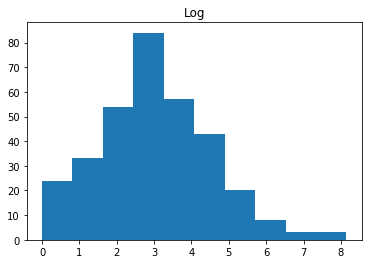

In [63]:
fig.add_subplot(222)
plt.hist(np.log(df_nonzero_data['Burglary']))
plt.title('Log')

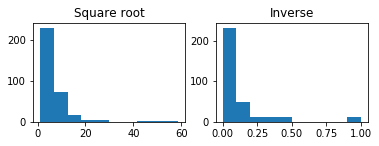

In [65]:
fig = plt.figure() 
fig.add_subplot(223)
plt.hist(np.sqrt(df_nonzero_data['Burglary']))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df_nonzero_data['Burglary'])
plt.title('Inverse')
plt.show()


The above analsys helps us to realize that multivariate non-normality can be resolve by using log of the variable as above

In [67]:
df_nonzero_data['Burglary_new'] = np.where(df_nonzero_data['Burglary']>0, 1, 0)

In [68]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df_nonzero_data['Property\ncrime'].values.reshape(-1, 1)
X = df_nonzero_data[['Population','population_square','Robbery_new','Burglary_new','murder_new']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[1.28575084e-02 1.15561664e-07 9.43287762e+01 0.00000000e+00
  1.84247011e+02]]

Intercept: 
 [-16.83035072]

R-squared:
0.8431084868769723
